In [1]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Funcion que carga los datos
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

In [3]:
#Funcion de la Hipotesis
def h_vec(x, theta):
    return np.dot(x, theta)

In [4]:
# Funcion de coste
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    return (1/(2 * len(X)))*np.dot(np.transpose(H-Y),(H-Y))

In [5]:
#Funcion que normaliza unos datos de entrada
#Devuelve los datos normalizados junto con la media y la desviacion estandar
def norm(X):
    X_norm = np.copy(X)
    means = []
    std = []
    for i in range(n):
        means.append(np.mean(X[:,i]))
        std.append(np.std(X[:,i]))
        X_norm[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
        
    return X_norm, means, std

In [6]:
#Funcion de descenso de gradiente 
def descenso_gradiente(X, Y, alpha):
    
    #Obtencion de los valores m y n
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    #Inicializacion de las thetas a 0
    thetas = np.zeros(n)
    
    #Realizacion de 1500 iteraciones
    costes = list()
    for i in range(1500):
        
        #Vector de differencia entre la función con la Thetas de esta iteración y los valores reales Y
        Aux = (h_vec(X, thetas) - Y)
        
        sum_x = np.dot(Aux, X)
        thetas -= (alpha / m) * sum_x   
        
        #Guardamos el valor de la función de coste de cada iteración
        costes.append(coste(X, Y, thetas))
        
    plt.plot(costes)
    plt.xlabel('Iteraciones'); plt.ylabel("J($\\theta_{0}$,$\\theta_{1}$)")
    plt.savefig("part2_costes.png")
    plt.show
    
    return thetas, costes

In [7]:
def linear_regresion_multiple_variables():
    data = load_csv('ex1data1.csv')

    #Carga de los datos
    datos = load_csv('ex1data2.csv')
    
    #Obtencion de todas las columnas de la tabla menos la ultima columna
    X = datos[:, :-1]
    np.shape(X)         # (97, 1)
    #Obtencion de la ultima columna de la tabla
    Y = datos[:, -1]
    np.shape(Y)         # (97,)
    
    #Obtencion de los valores m y n
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    #Normalizamos los datos de entrada
    Means = list()
    Std = list()
    for i in range(n):
        Means.append(np.mean(X[:,i]))
        Std.append(np.std(X[:,i]))
        X[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

    
    # añadimos una columna de 1's a la X
    X = np.hstack([np.ones([m, 1]), X])
    
    #Llamada a la funcion de descenso de gradiente
    alpha = 0.005
    Thetas, costes = descenso_gradiente(X, Y, alpha)
    print(Thetas)

    #ejemplo
    ejemplo = h_vec([1,(1650-Means[0])/Std[0] ,(3-Means[1])/Std[1]], Thetas)

    return [theta0, theta1, coste], ejemplo

[340227.89154751 107315.97282379  -4447.3463406 ]


([0, 0, <function __main__.coste(X, Y, Theta)>], 293365.7762652983)

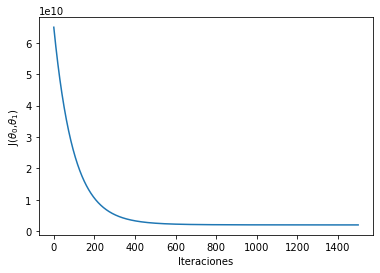

In [8]:
linear_regresion_multiple_variables()